# **Image to Sketch Conversion**

## **Elahe Khodaverdi - Fereshte Bagheri**

**`output files`**: [Sketch Output Link]()

---

## **Description**
The program processes static images and real-time video streams (webcam) to generate pencil sketch-style outputs. The functionalities include converting RGB images to grayscale sketches using Gaussian blur and edge enhancement.

---

## **Requirements**
- **Libraries**: OpenCV, NumPy, Matplotlib
- **File Structure**:
  - Input images stored in `images/`
  - Input videos stored in `videos/`
  - Processed images saved in `outputImages/`
  - Processed videos saved in `outputVideos/`

---

## **Outputs**
### **Expected Outputs**
1. **Images**:
   - Original images
   - Sketch-style versions of the images
2. **Videos**:
   - Original videos (from webcam)
   - Sketch-style videos

### **Sample Outputs**
- Processed images and videos are saved in the output directories upon execution.
- Real-time sketch-style outputs are displayed for webcam streams.

---

## **Algorithm Details**
1. **Grayscale Conversion**:
   - Converts the input image from RGB to grayscale.
2. **Inversion**:
   - Creates a negative of the grayscale image by inverting pixel intensities.
3. **Gaussian Blur**:
   - Applies Gaussian blur to the inverted image to create a smooth, semi-transparent effect.
4. **Inverted Blur**:
   - Inverts the blurred image for edge enhancement.
5. **Sketch Generation**:
   - Divides the original grayscale image by the inverted blurred image to create a pencil sketch effect.
6. **Output Generation**:
   - Displays the sketch and saves it in the specified output directories for both images and videos.

# Requirements

In [26]:
import cv2
import os
import matplotlib.pyplot as plt

# Load & Display Image

<function matplotlib.pyplot.show(close=None, block=None)>

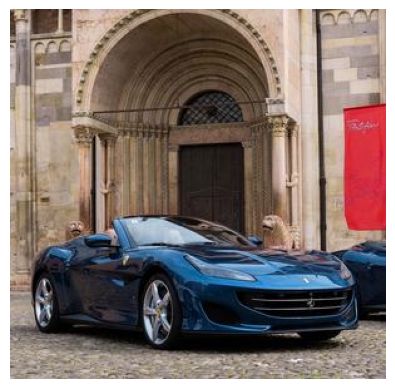

In [27]:
# image address
image_address = os.path.join("images", "car.jpg")

# read the image file
image = cv2.imread(image_address)

# convert channels from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# dispaly
plt.imshow(image)
plt.axis('off')
plt.show
# TODO

# Creating Sketch

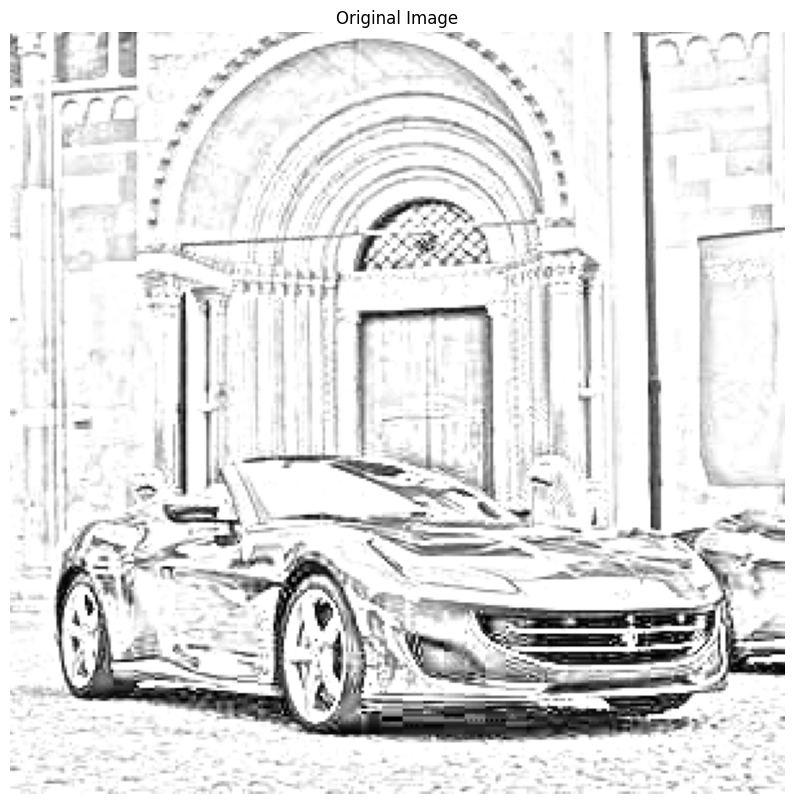

In [28]:
# Convert the input image from BGR to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Invert the grayscale image (i.e., produce a negative of the grayscale image)
inverted_image = 255 - gray_image

# Apply Gaussian blur to the inverted image with a kernel size of 21x21
blur_image = cv2.GaussianBlur(inverted_image, (21,21), 0)

# Invert the blurred image to produce a semi-transparent effect
inverted_blur = 255 - blur_image

# Divide the grayscale image by the inverted blurred image to produce the sketch effect
sketch = cv2.divide(gray_image, inverted_blur, scale=256)

output_image_path = os.path.join("outputImages", "car_sketch.jpg")
cv2.imwrite(output_image_path, sketch)

# display
plt.figure(figsize=(10, 10))
plt.imshow(sketch, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

In [29]:
# Create a function that takes an RGB image and outputs sketched image.
def sketch_image(rgb_image):
    
    gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
    inverted_image = 255 - gray_image
    blur_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)
    inverted_blur = 255 - blur_image
    sketch = cv2.divide(gray_image, inverted_blur, scale=256.0)

    return sketch



# Sketching WebCam Video Stream in Real-time


In [30]:
# Based on the the function you created, write a script to convert stream of frames from webcam into sketched frame.

output_video_path = os.path.join("outputVideos", "webcam_sketch.avi")

cap = cv2.VideoCapture(0)

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS) or 7)

fourcc = cv2.VideoWriter_fourcc(*"XVID")
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height), isColor=False)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    sketched_frame = sketch_image(rgb_frame)

    out.write(sketched_frame)
    cv2.imshow("Webcam Sketch", sketched_frame)

    if cv2.waitKey(33) == 27:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

# Sketching a Video in Real-time


In [31]:
output_video_path = os.path.join("outputVideos", "video_sketch.avi")

# Do the same thing for external video.
video_path = os.path.join("videos", "2.mp4")
cap = cv2.VideoCapture(video_path)

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS) or 7)

fourcc = cv2.VideoWriter_fourcc(*"XVID")
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height), isColor=False)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    sketched_frame = sketch_image(rgb_frame)
    out.write(sketched_frame)
    cv2.imshow("Webcam Sketch", sketched_frame)

    if cv2.waitKey(33) == 27:
        break

cap.release()
out.release()
cv2.destroyAllWindows()